# Rental Price Prediction

# Dataset Description

Pune is IT capital of India & a city with 10,089,916 population. Pune is one of the
larger employment producing cities. So Most of peoples are living in rental houses
& apartments.
Also this creates a good opportunity to back their financials by generating passive
income through rental money. But the problem is what rent they can expect for
their house and also how much tenants can expect to pay to respective landlords.
To solve this problem we have planned to create a Linear Regression model that
predicts the rental price which will be beneficial for both tenants and landlords.
For that, we have considered a dataset that covers almost all the important aspects
that one considers before taking a house on rent.

In [336]:

!pip install geocoder

import os 
from math import *   
from scipy.stats import * 
import numpy as np 
import re  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geocoder 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [337]:
data = pd.read_csv('D:\SLT\Rental_Price.csv')
print("Number of datapoints:", len(data))
print(data.shape)
data.head()

Number of datapoints: 5361
(5361, 30)


,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,Not provided,No,...,0,0,0,0,0,0,0,0,0.0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,...,0,0,0,0,0,0,0,63000,0.0,21000.0
2,2,2,900.0,Semifurnished,All,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,No Direction,Not provided,Yes,...,0,0,0,0,0,0,0,25000,0.0,12000.0
3,3,3,1100.0,Furnished,Family Only,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,East,Others,Yes,...,0,0,0,0,0,0,24000,3,0.0,24000.0
4,1,1,605.0,Semifurnished,Family Only,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,East,Vitrified,Yes,...,0,0,1,0,0,0,0,3,0.0,13500.0


In [338]:
data.tail()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
5356,2,2,0.0,Unfurnished,All,"Kesar Imperial Blue, Dighi, , Pune, Maharashtra",2,East,Marble,Yes,...,0,0,0,0,0,0,0,30000,0.0,14000.0
5357,1,1,0.0,Unfurnished,Bachelors (Men Only),"Karve Nagar, , Pune, Maharashtra",0,No Direction,Not provided,No,...,0,0,0,0,0,0,0,20000,0.0,10000.0
5358,3,3,1300.0,Semifurnished,All,"Kolte Patil IVY Estate, Wagholi, , Pune, Mahar...",5,North-West,Marble,Yes,...,0,0,0,0,1,0,16700,45000,0.0,16700.0
5359,3,3,1450.0,Unfurnished,All,"Pride Aloma County, Aundh, , Pune, Maharashtra",9,South-East,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,1,100000,1.0,33000.0
5360,2,2,850.0,Furnished,All,"Swapan Lok Society, Koregaon park, , Pune, Mah...",4,North,Granite,Yes,...,0,0,1,0,0,0,40000,120000,0.0,40000.0


In [339]:
print("Print a Summary of a Dataframe is :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            5361 non-null   int64  
 1   bathrooms          5361 non-null   int64  
 2   area               5361 non-null   float64
 3   furnishing         5361 non-null   object 
 4   avalable_for       5361 non-null   object 
 5   address            5361 non-null   object 
 6   floor_number       5361 non-null   int64  
 7   facing             5361 non-null   object 
 8   floor_type         5361 non-null   object 
 9   gate_community     5361 non-null   object 
 10  corner_pro         5361 non-null   object 
 11  parking            5361 non-null   int64  
 12  wheelchairadption  5361 non-null   object 
 13  petfacility        5361 non-null   object 
 14  aggDur             5361 non-null   int64  
 15  noticeDur          5361 non-null   int64  
 16  lightbill          5361 

In [340]:
data.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5.361000e+03,5361.000000,5361.000000
mean,1.790711,1.776721,547.474779,3.081701,0.876889,7.464093,0.727849,0.174408,0.706771,0.751539,0.059877,0.051669,0.125350,0.030964,0.041597,6734.678045,3.727598e+05,244.370718,17072.727136
std,0.754981,0.778649,1112.234717,2.432300,0.564290,7.872365,0.705513,0.379495,0.844765,0.432161,0.237281,0.221379,0.331146,0.173237,0.199684,17026.749858,2.458408e+07,1237.477605,10046.770284
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1600.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,10500.000000
50%,2.000000,2.000000,540.000000,2.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,15000.000000
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6500.000000,5.000000e+04,0.000000,20500.000000
max,8.000000,8.000000,53766.000000,9.000000,7.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.800050e+09,45000.000000,95000.000000


Removing the unnecessary column 

In [341]:
data.drop(['facing', 'floor_type','gate_community','corner_pro','wheelchairadption', 'petfacility','aggDur','noticeDur','lightbill', 'powerbackup','pooja_room', 'study_room','others','servant_room','store_room', 'maintenance_amt'], axis=1, inplace=True)

In [342]:
data.describe()

,bedroom,bathrooms,area,floor_number,parking,no_room,brok_amt,deposit_amt,mnt_amt,rent
count,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5.361000e+03,5361.000000,5361.000000
mean,1.790711,1.776721,547.474779,3.081701,0.876889,0.751539,6734.678045,3.727598e+05,244.370718,17072.727136
std,0.754981,0.778649,1112.234717,2.432300,0.564290,0.432161,17026.749858,2.458408e+07,1237.477605,10046.770284
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1600.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000e+00,0.000000,10500.000000
50%,2.000000,2.000000,540.000000,2.000000,1.000000,1.000000,0.000000,3.000000e+04,0.000000,15000.000000
75%,2.000000,2.000000,840.000000,5.000000,1.000000,1.000000,6500.000000,5.000000e+04,0.000000,20500.000000
max,8.000000,8.000000,53766.000000,9.000000,7.000000,1.000000,300000.000000,1.800050e+09,45000.000000,95000.000000


In [343]:
print("Print a Summary of a Dataframe is :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedroom       5361 non-null   int64  
 1   bathrooms     5361 non-null   int64  
 2   area          5361 non-null   float64
 3   furnishing    5361 non-null   object 
 4   avalable_for  5361 non-null   object 
 5   address       5361 non-null   object 
 6   floor_number  5361 non-null   int64  
 7   parking       5361 non-null   int64  
 8   propertyage   5361 non-null   object 
 9   no_room       5361 non-null   int64  
 10  brok_amt      5361 non-null   int64  
 11  deposit_amt   5361 non-null   int64  
 12  mnt_amt       5361 non-null   float64
 13  rent          5361 non-null   float64
dtypes: float64(3), int64(7), object(4)
memory usage: 586.5+ KB
Print a Summary of a Dataframe is : None


In [344]:
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
no_room,2
furnishing,4
propertyage,6
bedroom,7
bathrooms,7
avalable_for,8
parking,8
floor_number,10
mnt_amt,109
brok_amt,122


In [345]:
print(data['furnishing'].unique())
print(data['avalable_for'].unique())

['Semifurnished' 'Furnished' 'Unfurnished' 'Unfurnishe']
['All' 'Family Only' 'Family , Bachelors (Men Only)' 'None'
 'Family , Bachelors (Women Only)' 'Bachelors (Men/Women)'
 'Bachelors (Men Only)' 'Bachelors (Women Only)']


In [346]:
data['furnishing'] = data['furnishing'].replace(['Semifurnished', 'Furnished'],'Furnished')  
data['furnishing'] = data['furnishing'].replace(['Unfurnishe','Unfurnished'], 'Unfurnished')

In [347]:
print(data['furnishing'].unique())

['Furnished' 'Unfurnished']


In [348]:
data['avalable_for'].value_counts()

All                                2636
Family Only                        2229
Family , Bachelors (Women Only)     220
Family , Bachelors (Men Only)       123
Bachelors (Men Only)                 53
Bachelors (Men/Women)                48
Bachelors (Women Only)               34
None                                 18
Name: avalable_for, dtype: int64

In [349]:
data['avalable_for'] = data['avalable_for'].replace(['All', 'Family Only','Family , Bachelors (Women Only)','Family , Bachelors (Men Only)'],'Family')  
data['avalable_for'] = data['avalable_for'].replace(['Bachelors (Men Only)','Bachelors (Men/Women)','Bachelors (Women Only)','None'], 'Bachelors')

In [350]:
print(data['avalable_for'].unique())

['Family' 'Bachelors']


In [351]:
# 2. LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['avalable_for'])
data['avalable_for'] = le.transform(data['avalable_for'])
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,parking,propertyage,no_room,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,Furnished,1,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,1,1 to 5 Year Old,1,0,0,0.0,18500.0
1,2,2,1050.0,Furnished,1,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,1,0 to 1 Year Old,1,0,63000,0.0,21000.0
2,2,2,900.0,Furnished,1,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,1,5 to 10 Year Old,1,0,25000,0.0,12000.0
3,3,3,1100.0,Furnished,1,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,1,5 to 10 Year Old,1,24000,3,0.0,24000.0
4,1,1,605.0,Furnished,1,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,1,5 to 10 Year Old,0,0,3,0.0,13500.0


In [352]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['furnishing'])
data['furnishing'] = le.transform(data['furnishing'])
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,parking,propertyage,no_room,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,0,1,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,1,1 to 5 Year Old,1,0,0,0.0,18500.0
1,2,2,1050.0,0,1,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,1,0 to 1 Year Old,1,0,63000,0.0,21000.0
2,2,2,900.0,0,1,"Simplicity Apartments, Handewadi, , Pune, Maha...",6,1,5 to 10 Year Old,1,0,25000,0.0,12000.0
3,3,3,1100.0,0,1,"GK Dwarka Queens Park, Rahatani, , Pune, Mahar...",1,1,5 to 10 Year Old,1,24000,3,0.0,24000.0
4,1,1,605.0,0,1,"Anandtara Sayajiraje Avenue, Sasane Colony, , ...",4,1,5 to 10 Year Old,0,0,3,0.0,13500.0


# Outlier Handling

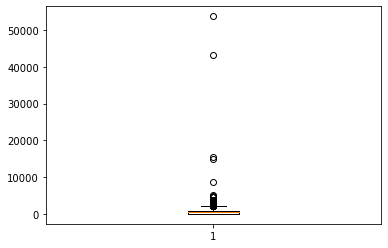

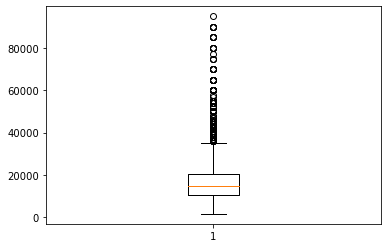

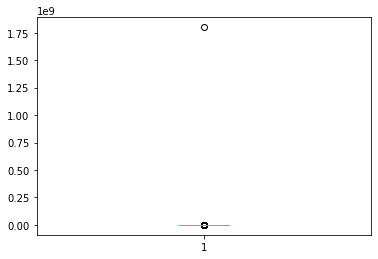

In [353]:
plt.boxplot(data['area'])
plt.show()
plt.boxplot(data['rent'])
plt.show()
plt.boxplot(data['deposit_amt'])
plt.show()

In [354]:
for x in data.index:
  if data.loc[x, "rent"] > 30000:
     data.drop(x, inplace = True)

<AxesSubplot:ylabel='rent'>

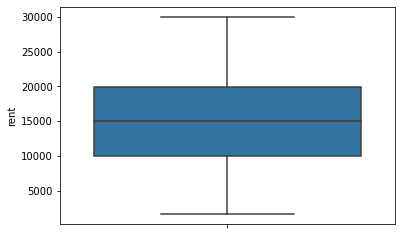

In [355]:
sns.boxplot( y='rent', data=data)

In [356]:
for x in data.index:
  if data.loc[x, "area"] > 1500:
     data.drop(x, inplace = True)

<AxesSubplot:ylabel='area'>

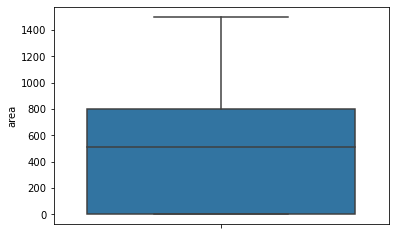

In [357]:
sns.boxplot( y='area', data=data)

<AxesSubplot:ylabel='deposit_amt'>

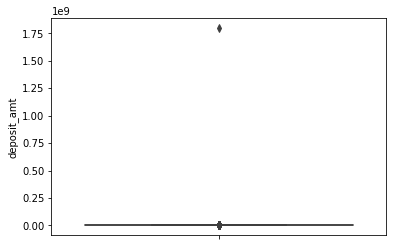

In [358]:
sns.boxplot( y='deposit_amt', data=data)

<AxesSubplot:>

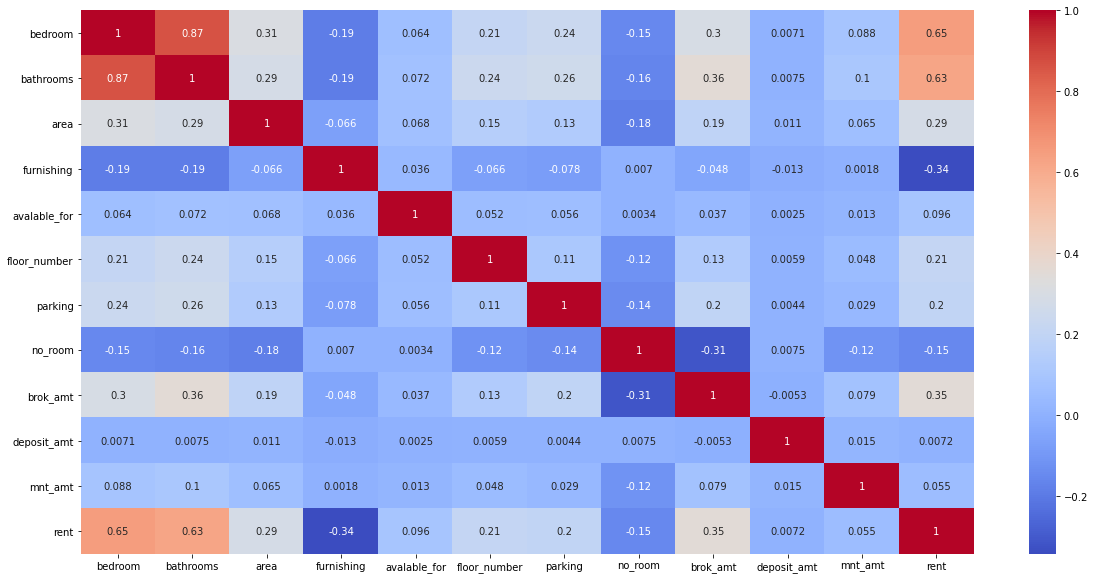

In [359]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm')

array([[<AxesSubplot:xlabel='bedroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedroom'>,
        <AxesSubplot:xlabel='area', ylabel='bedroom'>,
        <AxesSubplot:xlabel='furnishing', ylabel='bedroom'>,
        <AxesSubplot:xlabel='avalable_for', ylabel='bedroom'>,
        <AxesSubplot:xlabel='floor_number', ylabel='bedroom'>,
        <AxesSubplot:xlabel='parking', ylabel='bedroom'>,
        <AxesSubplot:xlabel='no_room', ylabel='bedroom'>,
        <AxesSubplot:xlabel='brok_amt', ylabel='bedroom'>,
        <AxesSubplot:xlabel='deposit_amt', ylabel='bedroom'>,
        <AxesSubplot:xlabel='mnt_amt', ylabel='bedroom'>,
        <AxesSubplot:xlabel='rent', ylabel='bedroom'>],
       [<AxesSubplot:xlabel='bedroom', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='area', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='furnishing', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='avalable_for', yla

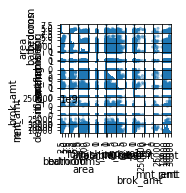

In [360]:
pd.plotting.scatter_matrix(data, figsize=(2,2))

In [361]:
data.drop(['address'], axis=1, inplace=True)

In [362]:
data.drop(['propertyage'], axis=1, inplace=True)

In [363]:
data = data[['bathrooms','furnishing','avalable_for','floor_number','parking','no_room','bedroom','area','brok_amt','deposit_amt','mnt_amt','rent']]

In [364]:
data.head()

,bathrooms,furnishing,avalable_for,floor_number,parking,no_room,bedroom,area,brok_amt,deposit_amt,mnt_amt,rent
0,2,0,1,1,1,1,2,0.0,0,0,0.0,18500.0
1,2,0,1,2,1,1,2,1050.0,0,63000,0.0,21000.0
2,2,0,1,6,1,1,2,900.0,0,25000,0.0,12000.0
3,3,0,1,1,1,1,3,1100.0,24000,3,0.0,24000.0
4,1,0,1,4,1,0,1,605.0,0,3,0.0,13500.0


In [365]:
print(data.shape)

(4962, 12)


# Linear Regression


In [665]:
X = data.iloc[:,0:11].values

In [666]:
y = data.iloc[:, 11].values

In [667]:
x_sr = data.iloc[:, 7:8].values

without split

In [668]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_sr, y)

LinearRegression()

In [669]:
regressor.predict(x_sr)

array([13104.59, 17583.22, 16943.42, ..., 13104.59, 13104.59, 18649.56])

In [670]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y, regressor.predict(x_sr)))
print("MSE: %.3f" % mean_squared_error(y, regressor.predict(x_sr)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(x_sr))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(x_sr))))

13104.589558740081
[4.27]
R2 score : 0.082
MSE: 35171609.162
RMSE: 5930.566
MAE: 69.405


Splitting Train and test  data

80:20

In [671]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [672]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [673]:
regressor.predict(x_test)

array([13173.29, 16562.74, 16997.93, 16520.9 , 15466.4 , 15474.77,
       13173.29, 16939.35, 15102.35, 13173.29, 15997.83, 16688.28,
       16755.23, 15474.77, 17357.8 , 13173.29, 15223.7 , 17776.25,
       15265.54, 16939.35, 17274.11, 16102.45, 13173.29, 13173.29,
       19031.6 , 13173.29, 13173.29, 16730.12, 13173.29, 16939.35,
       19031.6 , 13173.29, 17357.8 , 17232.26, 15642.15, 15265.54,
       17357.8 , 13173.29, 15265.54, 15851.38, 15684.  , 13173.29,
       13173.29, 16102.45, 13173.29, 16102.45, 17148.57, 13173.29,
       16889.13, 16479.05, 17776.25, 17148.57, 16102.45, 16730.12,
       13173.29, 14847.09, 16361.89, 15893.22, 13173.29, 13173.29,
       15964.36, 13173.29, 15098.16, 15893.22, 15056.32, 14512.33,
       15223.7 , 17567.03, 13173.29, 16462.31, 15684.  , 17776.25,
       14616.95, 15265.54, 16236.35, 13173.29, 15684.  , 14637.87,
       15579.38, 13173.29, 13173.29, 17776.25, 16102.45, 13173.29,
       13173.29, 16939.35, 13173.29, 14951.71, 13173.29, 13173

In [674]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

13173.289189082672
[4.18]
R2 score : 0.096
MSE: 34382288.588
RMSE: 5863.641
MAE: 68.925


In [675]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[13173.29 17000.  ]
 [16562.74 22000.  ]
 [16997.93 21000.  ]
 ...
 [15391.08 15000.  ]
 [13173.29 12000.  ]
 [15643.36 11000.  ]]


In [676]:
df_pred=pd.DataFrame()
df_pred["y_actual"]= y_test
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,17000.0,13173.3
1,22000.0,16562.7
2,21000.0,16997.9
3,20000.0,16520.9
4,11000.0,15466.4
...,...,...
988,8000.0,13173.3
989,15000.0,13173.3
990,15000.0,15391.1
991,12000.0,13173.3


70:30

In [677]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [678]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [679]:
regressor.predict(x_test)

array([13130.2 , 16640.15, 17090.81, ..., 13130.2 , 13130.2 , 17376.8 ])

In [680]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

13130.196115898008
[4.33]
R2 score : 0.076
MSE: 34969655.948
RMSE: 5913.515
MAE: 69.163


50:50

In [681]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.5, random_state=0)

In [682]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [683]:
regressor.predict(x_test)

array([13088.47, 16578.63, 17026.75, ..., 14941.27, 13088.47, 18474.53])

In [684]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

13088.469213623117
[4.31]
R2 score : 0.080
MSE: 35336474.511
RMSE: 5944.449
MAE: 69.419


Gradient Descent

learning rate = 0.1

In [685]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.1

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [686]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[13088.47 17000.  ]
 [16578.63 22000.  ]
 [17026.75 21000.  ]
 ...
 [14941.27  7500.  ]
 [13088.47 17000.  ]
 [18474.53 25000.  ]]


In [687]:
x_zero = np.full((len(data.area),1), data.rent.mean())

In [688]:
x_sr =x_zero
y = data.iloc[:, 11].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

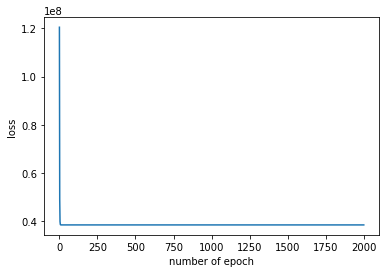

In [689]:
w,b=gradient_descent(X_transform,y_train)

In [690]:
print("weight:",w)
print("bias:",b)

weight: [7553.88]
bias: 7553.344131603516


In [691]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [692]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [693]:
df_pred=pd.DataFrame()
df_pred["y_actual"]= y_test
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,17000.0,13092.8
1,22000.0,13092.8
2,21000.0,13092.8
3,20000.0,13092.8
4,11000.0,13092.8
...,...,...
988,8000.0,13092.8
989,15000.0,13092.8
990,15000.0,13092.8
991,12000.0,13092.8


In [694]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

13088.469213623117
[4.31]
R2 score : -0.100
MSE: 41851983.353
RMSE: 6469.311
MAE: 71.703


0.001

In [695]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [696]:
x_zero = np.full((len(data.area),1), data.rent.mean())

In [697]:
x_sr =x_zero
y = data.iloc[:, 11].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

In [698]:
print("weight:",w)
print("bias:",b)

weight: [7553.88]
bias: 7553.344131603516


In [699]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [700]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [701]:
df_pred=pd.DataFrame()
df_pred["y_actual"]= y_test
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,17000.0,13092.8
1,22000.0,13092.8
2,21000.0,13092.8
3,20000.0,13092.8
4,11000.0,13092.8
...,...,...
988,8000.0,13092.8
989,15000.0,13092.8
990,15000.0,13092.8
991,12000.0,13092.8


In [702]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

13088.469213623117
[4.31]
R2 score : -0.100
MSE: 41851983.353
RMSE: 6469.311
MAE: 71.703


0.5

In [703]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.5

    for i in range(epoch):
        
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [704]:
x_zero = np.full((len(data.area),1), data.rent.mean())

In [705]:
x_sr =x_zero
y = data.iloc[:, 11].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

In [706]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [707]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

13088.469213623117
[4.31]
R2 score : -0.100
MSE: 41851983.353
RMSE: 6469.311
MAE: 71.703


# 0.05

In [708]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.05

    for i in range(epoch):
        
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [709]:
x_zero = np.full((len(data.area),1), data.rent.mean())

In [710]:
x_sr =x_zero
y = data.iloc[:, 11].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

In [711]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [712]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

13088.469213623117
[4.31]
R2 score : -0.100
MSE: 41851983.353
RMSE: 6469.311
MAE: 71.703


# 1

In [713]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 1

    for i in range(epoch):
        
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [714]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [715]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

13088.469213623117
[4.31]
R2 score : -0.100
MSE: 41851983.353
RMSE: 6469.311
MAE: 71.703


# multiple linear regression 

area and brok_amt

In [716]:
x_sr = data.iloc[:, 7:9].values

without split

In [717]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_sr, y)

LinearRegression()

In [718]:
regressor.predict(x_sr)

array([12759.93, 16329.89, 15819.9 , ..., 12759.93, 12759.93, 19739.84])

In [719]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y, regressor.predict(x_sr)))
print("MSE: %.3f" % mean_squared_error(y, regressor.predict(x_sr)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(x_sr))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(x_sr))))

12759.931789731401
[3.4  0.15]
R2 score : 0.173
MSE: 31665432.799
RMSE: 5627.205
MAE: 67.389


Splitting Train and test  data

80:20

In [720]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [721]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [722]:
regressor.predict(x_test)

array([12846.31, 18763.85, 18967.39, 15530.77, 14685.16, 14691.87,
       12846.31, 15866.32, 14393.23, 12846.31, 15111.32, 17991.92,
       18045.61, 14691.87, 16201.88, 12846.31, 15799.44, 16537.73,
       14524.09, 15866.32, 20497.76, 16940.4 , 12846.31, 12846.31,
       17544.55, 12846.31, 17209.3 , 15698.55, 17063.86, 18920.42,
       22343.4 , 12846.31, 20564.87, 19882.47, 14826.1 , 14524.09,
       18528.81, 12846.31, 14524.09, 14993.87, 14859.65, 12846.31,
       13573.47, 15195.21, 12846.31, 15195.21, 16034.1 , 12846.31,
       18734.72, 15497.21, 16537.44, 20106.23, 15195.21, 19625.24,
       12846.31, 14188.54, 15403.25, 15027.43, 12846.31, 12846.31,
       15084.48, 15754.97, 14389.87, 15027.43, 14356.32, 13920.09,
       14490.54, 16369.66, 16482.13, 15483.79, 14859.65, 16537.44,
       14003.98, 18596.22, 15302.59, 12846.31, 14859.65, 14020.76,
       14775.76, 15173.24, 12846.31, 16537.44, 15195.21, 12846.31,
       12846.31, 15866.32, 12846.31, 14272.43, 12846.31, 12846

In [723]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12846.31 17000.  ]
 [18763.85 22000.  ]
 [18967.39 21000.  ]
 ...
 [14624.76 15000.  ]
 [12846.31 12000.  ]
 [14827.07 11000.  ]]


In [724]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

12846.30805788961
[3.36 0.15]
Intercept: 12846.308
R2 score : 0.206
MSE: 30211530.443
RMSE: 5496.502
MAE: 66.801


70:30

In [725]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [726]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [727]:
regressor.predict(x_test)

array([12784.22, 19195.05, 19373.06, ..., 63385.08, 12784.22, 20773.75])

In [728]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

12784.22139310419
[3.33 0.17]
R2 score : 0.152
MSE: 32075203.035
RMSE: 5663.497
MAE: 67.246


50:50

In [729]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.5, random_state=0)

In [730]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [731]:
regressor.predict(x_test)

array([12707.77, 19039.78, 19248.29, ..., 14776.52, 12707.77, 17113.53])

In [732]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

12707.770876911118
[3.52 0.16]
R2 score : 0.170
MSE: 31903051.523
RMSE: 5648.279
MAE: 67.408


area and brok_amt and deposit_amt	

without split

In [733]:
x_sr = data.iloc[:, 7:10].values

In [734]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_sr, y)

LinearRegression()

In [735]:
regressor.predict(x_sr)

array([12759.73, 16328.59, 15818.71, ..., 12759.78, 12759.77, 19738.62])

In [736]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y, regressor.predict(x_sr)))
print("MSE: %.3f" % mean_squared_error(y, regressor.predict(x_sr)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(x_sr))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(x_sr))))

12759.73390583996
[3.40e+00 1.53e-01 1.56e-06]
R2 score : 0.173
MSE: 31663837.185
RMSE: 5627.063
MAE: 67.385


80:20

In [737]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:10].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [738]:
regressor.predict(x_test)

array([12846.16, 18763.1 , 18966.58, 15529.42, 14684.17, 14690.91,
       12846.12, 15864.88, 14392.36, 12846.09, 15110.15, 17991.04,
       18044.7 , 14690.91, 16200.25, 12846.09, 15798.82, 16535.96,
       14523.21, 15864.83, 20497.15, 16939.58, 12846.09, 12846.14,
       17542.35, 12846.22, 17210.11, 15697.17, 17064.69, 18919.59,
       22342.13, 12846.09, 20564.22, 19881.73, 14825.06, 14523.21,
       18527.7 , 12846.09, 14523.17, 14992.79, 14858.62, 12846.2 ,
       13573.42, 15194.05, 12846.1 , 15194.04, 16032.62, 12846.15,
       18733.9 , 15495.94, 16535.74, 20105.57, 15194.05, 19624.71,
       12846.09, 14187.78, 15401.96, 15026.35, 12846.09, 12846.12,
       15083.39, 15755.42, 14389.04, 15026.29, 14355.51, 13919.42,
       14489.64, 16368.05, 16482.74, 15482.5 , 14858.6 , 16535.7 ,
       14003.32, 18596.13, 15301.44, 12846.2 , 14858.58, 14020.07,
       14774.73, 15173.53, 12846.14, 16535.79, 15194.  , 12846.16,
       12846.13, 15864.91, 12846.15, 14271.68, 12846.09, 12846

In [739]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12846.16 17000.  ]
 [18763.1  22000.  ]
 [18966.58 21000.  ]
 ...
 [14623.86 15000.  ]
 [12846.13 12000.  ]
 [14826.06 11000.  ]]


In [740]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

12846.088221166305
[3.35e+00 1.45e-01 1.51e-06]
Intercept: 12846.088
R2 score : 0.206
MSE: 30210996.859
RMSE: 5496.453
MAE: 66.801


70:30

In [741]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:10].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [742]:
regressor.predict(x_test)

array([12784.04, 19194.28, 19372.18, ..., 63396.75, 12784.02, 20773.05])

In [743]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

12783.960031279501
[3.33e+00 1.69e-01 1.55e-06]
Intercept: 12783.960
R2 score : 0.152
MSE: 32075222.817
RMSE: 5663.499
MAE: 67.245


50:50

In [744]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:10].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.5, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [745]:
regressor.predict(x_test)

array([13680.92, 17171.83, 20471.48, ..., 13381.94, 13680.92, 15631.87])

In [746]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

11473.530245410037
[3.33 0.14 0.04]
Intercept: 11473.530
R2 score : -66250.222
MSE: 2545200752545.894
RMSE: 1595368.532
MAE: 190.362


area and brok_amt and deposit_amt and mnt_amt

In [747]:
x_sr = data.iloc[:, 7:11].values

In [748]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_sr, y)

LinearRegression()

In [749]:
regressor.predict(x_sr)

array([12750.01, 16305.77, 15797.76, ..., 12750.06, 12750.04, 19703.5 ])

In [750]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y, regressor.predict(x_sr)))
print("MSE: %.3f" % mean_squared_error(y, regressor.predict(x_sr)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(x_sr))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(x_sr))))

12750.01162458542
[3.39e+00 1.53e-01 1.50e-06 8.35e-02]
R2 score : 0.173
MSE: 31654053.836
RMSE: 5626.194
MAE: 67.385


80:20

In [751]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:11].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [752]:
regressor.predict(x_test)

array([12836.81, 18734.27, 18937.17, 15511.8 , 14669.16, 14683.39,
       12934.49, 15846.23, 14378.25, 12874.33, 15093.82, 17964.92,
       18018.42, 14675.87, 16180.57, 13062.26, 15779.86, 16515.24,
       14508.69, 15846.19, 20612.85, 16916.93, 12836.74, 12836.79,
       17631.29, 12836.87, 17185.59, 15754.21, 17040.68, 18890.33,
       22489.57, 12836.74, 20529.37, 19849.29, 14809.62, 14508.69,
       18499.93, 12836.74, 14508.65, 14976.83, 14843.07, 12836.85,
       13599.13, 15177.54, 12836.76, 15177.46, 16013.45, 13062.32,
       18705.26, 15478.42, 16515.02, 20072.25, 15177.46, 19780.86,
       12836.74, 14189.34, 15384.74, 15010.28, 12836.74, 12836.77,
       15261.47, 15735.96, 14457.63, 15010.23, 14567.02, 13906.77,
       14490.27, 16347.85, 16460.75, 15465.03, 14843.05, 16514.99,
       13990.41, 18627.6 , 15284.52, 12836.85, 14843.04, 14007.1 ,
       14759.44, 15156.1 , 12836.79, 16515.07, 15290.18, 12836.81,
       12836.78, 15846.26, 12881.9 , 14325.6 , 12836.74, 12836

In [753]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12836.81 17000.  ]
 [18734.27 22000.  ]
 [18937.17 21000.  ]
 ...
 [14671.68 15000.  ]
 [12836.78 12000.  ]
 [14810.61 11000.  ]]


In [754]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

[3.34e+00 1.45e-01 1.46e-06 7.52e-02]
Intercept: 12836.741
R2 score : 0.206
MSE: 30198796.912
RMSE: 5495.343
MAE: 66.793


70:30

In [755]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:11].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [756]:
regressor.predict(x_test)

array([12775.94, 19167.19, 19344.9 , ..., 63212.05, 12775.93, 20741.16])

In [757]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

[3.32e+00 1.68e-01 1.51e-06 6.16e-02]
Intercept: 12775.867
R2 score : 0.153
MSE: 32057152.446
RMSE: 5661.904
MAE: 67.243


50:50

In [758]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_sr = data.iloc[:, 7:11].values

x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.5, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [759]:
regressor.predict(x_test)

array([13701.16, 17197.22, 20515.09, ..., 13392.96, 13701.16, 15643.43])

In [760]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.coef_)
print("Intercept: %0.3f" % regressor.intercept_)
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(x_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(x_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(x_test))))

[ 3.33  0.14  0.04 -0.09]
Intercept: 11480.524
R2 score : -67047.606
MSE: 2575834214021.463
RMSE: 1604940.564
MAE: 190.865


Gradient Descent

learning rate = 0.1

In [761]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.1

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [762]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[13701.16 17000.  ]
 [17197.22 22000.  ]
 [20515.09 21000.  ]
 ...
 [13392.96  7500.  ]
 [13701.16 17000.  ]
 [15643.43 25000.  ]]


In [763]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [764]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

11480.523883078311
[ 3.33  0.14  0.04 -0.09]
R2 score : -0.344
MSE: 51647335.857
RMSE: 7186.608
MAE: 74.920


In [765]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [766]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [767]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

11480.523883078311
[ 3.33  0.14  0.04 -0.09]
R2 score : -0.344
MSE: 51647335.857
RMSE: 7186.608
MAE: 74.920


In [768]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 1

    for i in range(epoch):
        
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [769]:
X_test=sc.fit_transform(x_test)
y_pred=regressor.predict(X_test)

In [770]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(regressor.intercept_)
print(regressor.coef_)
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

11480.523883078311
[ 3.33  0.14  0.04 -0.09]
R2 score : -0.344
MSE: 51647335.857
RMSE: 7186.608
MAE: 74.920


polynomial regression

withoutsplit

In [778]:
X = data.iloc[:,0:11].values

In [779]:
y = data.iloc[:, 11].values

In [780]:
x_sr = data.iloc[:, 7:8].values

In [781]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(x_sr)


polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y)

LinearRegression()

In [782]:
polyreg.predict(X_train_2_d)

array([13104.59, 17583.22, 16943.42, ..., 13104.59, 13104.59, 18649.56])

In [788]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)

print("MSE: %.3f" % mean_squared_error(y, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, polyreg.predict(X_train_2_d))))

14846.335999262039
[ 0.00e+00 -3.41e+01  6.55e-02 -2.61e-05]
MSE: 27467262.448
RMSE: 5240.922
MAE: 64.586


In [792]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_sr))
from sklearn import metrics 
r_square=metrics.r2_score(y,y_predict_polyr)
r_square

0.2827270296026162

In [793]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_sr)


polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y)

LinearRegression()

In [794]:
polyreg.predict(X_train_2_d)

array([14500.85, 19416.92, 16579.87, ..., 14500.85, 14500.85, 25726.64])

In [795]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)

print("MSE: %.3f" % mean_squared_error(y, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, polyreg.predict(X_train_2_d))))

14500.849020373254
[  0.   -11.92   0.02]
MSE: 29243723.539
RMSE: 5407.747
MAE: 65.686


In [796]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_sr))
from sklearn import metrics 
r_square=metrics.r2_score(y,y_predict_polyr)
r_square

0.23633698524040758

In [797]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_train_2_d = poly_reg.fit_transform(x_sr)


polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y)

LinearRegression()

In [798]:
polyreg.predict(X_train_2_d)

array([14846.34, 21006.12, 18155.73, ..., 14846.34, 14846.34, 23820.76])

In [799]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)

print("MSE: %.3f" % mean_squared_error(y, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, polyreg.predict(X_train_2_d))))

14846.335999262039
[ 0.00e+00 -3.41e+01  6.55e-02 -2.61e-05]
MSE: 27467262.448
RMSE: 5240.922
MAE: 64.586


In [800]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_sr))
from sklearn import metrics 
r_square=metrics.r2_score(y,y_predict_polyr)
r_square

0.2827270296026162

Splitting Train and test  data

80:20

In [830]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [831]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)


LinearRegression()

In [832]:
polyreg.predict(X_train_2_d)

array([15265.54, 15340.87, 13173.29, ..., 13439.88, 13173.29, 15684.  ])

In [833]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

13173.289189082672
[0.   4.18]
MSE: 35371690.460
RMSE: 5947.410
MAE: 69.570


In [834]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.09615014186887016

In [835]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)


LinearRegression()

In [836]:
polyreg.predict(X_train_2_d)

array([12493.67, 12568.5 , 14572.96, ..., 13861.78, 14572.96, 13041.06])

In [837]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14572.961448875707
[  0.   -12.19   0.02]
MSE: 29323776.097
RMSE: 5415.143
MAE: 65.709


In [838]:
polyreg.coef_

array([  0.  , -12.19,   0.02])

In [839]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.23921669926923084

In [840]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)


LinearRegression()

In [841]:
polyreg.predict(X_train_2_d)

array([10902.98, 11124.45, 14918.71, ..., 12983.69, 14918.71, 12325.83])

In [842]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14918.71102334341
[ 0.00e+00 -3.45e+01  6.60e-02 -2.63e-05]
MSE: 27528101.819
RMSE: 5246.723
MAE: 64.623


In [843]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.28391978463168865

70:30

In [844]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [845]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [846]:
polyreg.predict(X_train_2_d)

array([15730.16, 17376.8 , 13130.2 , ..., 13406.27, 13130.2 , 15730.16])

In [847]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

13130.19611589801
[0.   4.33]
MSE: 35264014.090
RMSE: 5938.351
MAE: 69.555


In [848]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.07554512690821458

In [849]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [850]:
polyreg.predict(X_train_2_d)

array([13116.52, 18093.82, 14481.61, ..., 13800.68, 14481.61, 13116.52])

In [851]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14481.607078660303
[  0.   -11.69   0.02]
MSE: 29475359.313
RMSE: 5429.121
MAE: 65.808


In [852]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.24084867519236242

In [853]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [854]:
polyreg.predict(X_train_2_d)

array([12366.59, 19917.57, 14838.89, ..., 12884.69, 14838.89, 12366.59])

In [855]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14838.88985795937
[ 0.00e+00 -3.49e+01  6.76e-02 -2.73e-05]
MSE: 27550332.660
RMSE: 5248.841
MAE: 64.660


In [856]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.2782041291793639

50:50

In [817]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.5, random_state=0)

In [857]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [858]:
polyreg.predict(X_train_2_d)

array([15730.16, 17376.8 , 13130.2 , ..., 13406.27, 13130.2 , 15730.16])

In [859]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

13130.19611589801
[0.   4.33]
MSE: 35264014.090
RMSE: 5938.351
MAE: 69.555


In [860]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.07554512690821458

In [818]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [819]:
polyreg.predict(X_train_2_d)

array([23052.6 , 13044.35, 24671.28, ..., 13762.96, 14443.74, 13089.89])

In [820]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14443.73755307516
[  0.   -11.69   0.02]
MSE: 29307935.070
RMSE: 5413.680
MAE: 65.617


In [821]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.24027034078383325

In [861]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)

X_train_2_d = poly_reg.fit_transform(x_train)

X_train_2_d
polyreg = LinearRegression()
polyreg.fit(X_train_2_d, y_train)

LinearRegression()

In [862]:
polyreg.predict(X_train_2_d)

array([12366.59, 19917.57, 14838.89, ..., 12884.69, 14838.89, 12366.59])

In [863]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(polyreg.intercept_)
print(polyreg.coef_)
print("MSE: %.3f" % mean_squared_error(y_train, polyreg.predict(X_train_2_d)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_train, polyreg.predict(X_train_2_d))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_train, polyreg.predict(X_train_2_d))))

14838.88985795937
[ 0.00e+00 -3.49e+01  6.76e-02 -2.73e-05]
MSE: 27550332.660
RMSE: 5248.841
MAE: 64.660


In [864]:
# import metrics
y_predict_polyr = polyreg.predict(poly_reg.fit_transform(x_test))
from sklearn import metrics 
r_square=metrics.r2_score(y_test,y_predict_polyr)
r_square

0.2782041291793639

Ridge

In [871]:
X = data.iloc[:,0:11].values

In [872]:
y = data.iloc[:, 11].values

In [873]:
x_sr = data.iloc[:, 7:8].values

In [874]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [875]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)

In [876]:
model.predict(x_test)

array([13130.2 , 16640.15, 17090.81, ..., 13130.2 , 13130.2 , 17376.8 ])

In [879]:
print(model.intercept_)
print(model.coef_)



13130.196448933637
[4.33]


In [887]:
x_sr = data.iloc[:, 8:9].values

In [888]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [889]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)

In [890]:
model.predict(x_test)

array([14195.33, 18452.79, 18259.27, ..., 72251.59, 14195.33, 19613.91])

In [891]:
print(model.intercept_)
print(model.coef_)

14195.329073784458
[0.19]


In [892]:
x_sr = data.iloc[:, 9:10].values

In [893]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [894]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)

In [895]:
model.predict(x_test)

array([15117.83, 15117.75, 15117.87, ..., 15117.75, 15117.82, 15117.88])

In [896]:
print(model.intercept_)
print(model.coef_)

15117.749917415069
[1.7e-06]


In [919]:
x_sr = data.iloc[:, 10:11].values

In [920]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.3, random_state=0)

In [921]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)

In [922]:
model.predict(x_test)

array([15059.18, 15059.18, 15059.18, ..., 15059.18, 15059.18, 15059.18])

In [923]:
print(model.intercept_)
print(model.coef_)

15059.184884159591
[0.26]


lasso

In [897]:
X = data.iloc[:,0:11].values

In [898]:
y = data.iloc[:, 11].values

In [899]:
x_sr = data.iloc[:, 7:8].values

In [900]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [901]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, x_train)

test_pred = model.predict(x_test)


In [902]:
model.predict(x_train)

array([5.00e+02, 5.18e+02, 2.71e-04, ..., 6.37e+01, 2.71e-04, 6.00e+02])

In [903]:
print(model.intercept_)
print(model.coef_)


[0.]
[1.]


In [904]:
x_sr = data.iloc[:, 8:9].values

In [905]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [906]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, x_train)

test_pred = model.predict(x_test)

In [907]:
model.predict(x_train)

array([3.00e-06, 3.00e-06, 2.75e+04, ..., 1.65e+04, 1.25e+04, 3.00e-06])

In [908]:
print(model.intercept_)
print(model.coef_)

[3.e-06]
[1.]


In [909]:
x_sr = data.iloc[:, 9:10].values

In [910]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [911]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, x_train)

test_pred = model.predict(x_test)

In [912]:
model.predict(x_train)

array([25000., 15000., 60000., ..., 50000., 30000., 30000.])

In [913]:
print(model.intercept_)
print(model.coef_)

[5.82e-11]
[1.]


In [914]:
x_sr = data.iloc[:, 10:11].values

In [915]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

In [916]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, x_train)

test_pred = model.predict(x_test)

In [917]:
model.predict(x_train)

array([1.37e-05, 1.37e-05, 1.37e-05, ..., 1.37e-05, 1.37e-05, 5.00e+02])

In [918]:
print(model.intercept_)
print(model.coef_)

[1.37e-05]
[1.]


Mean squared error is:  26419915.668802228
Regression Coefficient :  [4.26]
Intercept:  13112.920218178091


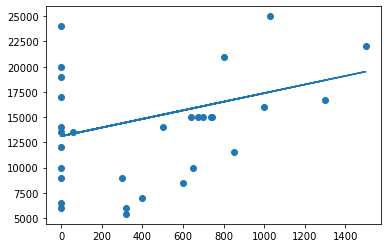

In [459]:
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
data_X = data[["area"]]
data_X_train = data_X[:-30]
data_X_test = data_X[-30:]

data_y_train = data.rent[:-30]
data_y_test = data.rent[-30:]

model = linear_model.LinearRegression()
model.fit(data_X_train,data_y_train)
data_y_predicted = model.predict(data_X_test)

print("Mean squared error is: ", mean_squared_error(data_y_test, data_y_predicted))

print("Regression Coefficient : ", model.coef_)
print("Intercept: ", model.intercept_)
plt.scatter(data_X_test, data_y_test)
plt.plot(data_X_test, data_y_predicted)
plt.show()
